<a href="https://colab.research.google.com/github/alejomd17/Ejercicios_de_Python/blob/main/An%C3%A1lisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
plt.subplot(1,3,3)

# Punto 1. 
Mediante la ayuda de su software de preferencia, separe los componentes X y Y. Adicionalmente, visualice los datos mediante un scatter plot. De acuerdo con los resultados presentados en el scatter plot, ¿concluye si los datos pueden ser ajustados por una línea recta? 



##Datos

In [ ]:
x = np.array([0.05,0.18,0.31,0.42,0.5])
y= np.array([0.12,0.22,0.35,0.38,0.49])
print(x,y)

[0.05 0.18 0.31 0.42 0.5 ] [0.12 0.22 0.35 0.38 0.49] (0.08215135794934389, 0.7871528837351235)


##Gráfica

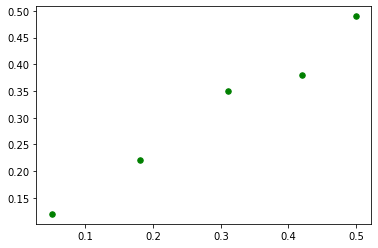

In [ ]:
plt.scatter(x, y, color = "g", marker = "o", s=30)

## Respuesta
Efectivamente los datos pueden ser ajustados por línea recta, ya que siguen una tendencia lineal. Ambos podrían asumirse muy correlacionados entre sí, ya que ante un crecimiento en el comportamiento de uno incide en el crecimiento de la otra.


#Punto 2
Uno de los enfoques para resolver el problema de regresión lineal es utilizar la matriz inversa. Mediante el software de su preferencia, calcule el coeficiente de la regresión b, y utilícelo para calcular el valor predicho de Y. Posteriormente, grafique los datos mediante un scatter plot.


### Forma aritmética

In [ ]:
def estimate_b0_b1(x, y):
    n = np.size(x)
    #obtenemos los promedios de X y de Y
    m_x, m_y = np.mean(x), np.mean(y)

    #Calcular sumatoria de XY y mi sumatoria de XX
    Sumatoria_xy = np.sum((x-m_x)*(y-m_y))
    Sumatoria_xx = np.sum(x*(x-m_x))

    #coeficientes de regresion
    b_1 = Sumatoria_xy / Sumatoria_xx
    b_0 = m_y - b_1*m_x

    return(b_0, b_1)

In [ ]:
b = estimate_b0_b1(x, y)
print(x,y,b)

### Forma matricial

In [ ]:
X = np.array([np.ones(len(x)),x]).T
X

array([[1.  , 0.05],
       [1.  , 0.18],
       [1.  , 0.31],
       [1.  , 0.42],
       [1.  , 0.5 ]])

In [ ]:
B = np.linalg.inv(X.T @ X) @ X.T @ y
B

array([0.08215136, 0.78715288])

### Gráfica

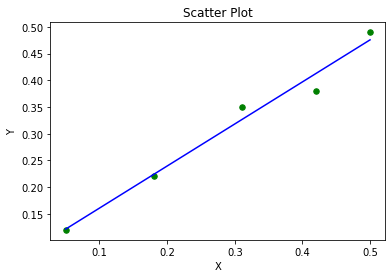

In [ ]:
plt.scatter(x, y, color = "g", marker = "o", s=30)
y_pred = b[0] + b[1]*x
plt.plot(x, y_pred, color = "b")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.show()

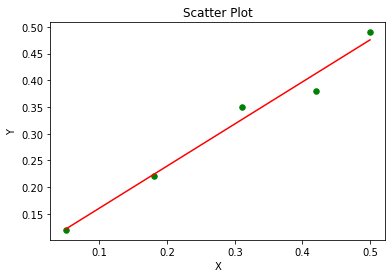

In [ ]:
plt.scatter(x, y, color = "g", marker = "o", s=30)
y_pred = B[0] + B[1]*x
plt.plot(x, y_pred, color = "r")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.show()

## Respuesta
Se comprueba que al calcular el coeficiente de regresión, tiene una tendencia lineal. Al calcular los coeficientes de regresión B podemos calcular las proyecciones de y, concluyendo que tienen una tendencia lineal positiva. Esto da más viabilidad de que se confirme la hipotesis del enciso anterior que estos datos tienen una alta correlación.

# Punto 3
Se presenta el histograma y el boxplot de las valoraciones de 1 a 10 proporcionadas por 1000 individuos en 4 países distintos A, B, C y D sobre la percepción de la corrupción en su país. Una valoración alta quiere decir que el individuo percibe que en su país hay mucha corrupción.

##a. Histogramas

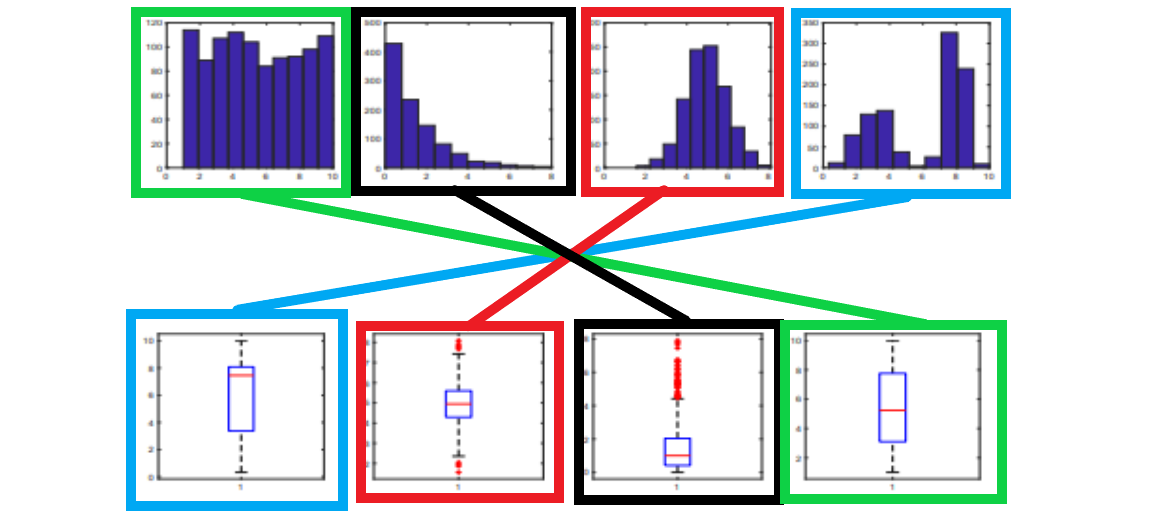

##b. Baja Corrupción
El país donde sus habitantes perciben que no hay mucha corrupción es el país B. Esto es explicado por su histograma, donde podemos comprobar que un porcentaje muy alto de la población (420 personas aproximadamente) considera que el nivel de corrupción de su país es 0 o inferior. De igual forma muy pocas personas consideran que se encuentra en niveles de corrupción inclusive superiores a 6.
Su diagrama de cajas también identifica este mismo comportamiento al tener sus puntos en el rango más bajo, y solo unos cuantos puntos atípicos que incluso se tienen a excluir.

##c. No es clara la Corrupción
De igual forma, el país donde no es clara la corrupción es el país A, ya que tiene altas cantidades de respuestas en todos sus niveles de corrupción. Esto es comprobado tanto por la caja como por el histograma, donde sus puntos son mucho más amplios en todos los niveles.

##d. Como sería en Colombia
Consideraría que la distribución que más se acogería a la percepción actual de colombia es la presentada a continuación, donde una gran parte de su población tiene una imagen sumamente negativa de la corrupción, considerada como la cuna de los problemas del país.

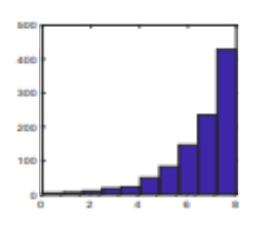

#Punto 4

##Datos

In [ ]:
# Obtener datos: dataset-94093
#https://drive.google.com/file/d/1PVtE1WQNlVfkHSQ7tqBlKYKWL65JR2r3/view?usp=sharing

!wget 'https://drive.google.com/uc?export=download&id=1PVtE1WQNlVfkHSQ7tqBlKYKWL65JR2r3' -O dataset-94093.csv

--2021-10-14 19:25:43--  https://drive.google.com/uc?export=download&id=1PVtE1WQNlVfkHSQ7tqBlKYKWL65JR2r3
Resolving drive.google.com (drive.google.com)... 173.194.195.138, 173.194.195.101, 173.194.195.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.195.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rppql90jpnavl2eevuvpph6d2l9vbtat/1634239500000/13858096913736680706/*/1PVtE1WQNlVfkHSQ7tqBlKYKWL65JR2r3?e=download [following]
--2021-10-14 19:25:44--  https://doc-0g-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rppql90jpnavl2eevuvpph6d2l9vbtat/1634239500000/13858096913736680706/*/1PVtE1WQNlVfkHSQ7tqBlKYKWL65JR2r3?e=download
Resolving doc-0g-0s-docs.googleusercontent.com (doc-0g-0s-docs.googleusercontent.com)... 142.250.152.132, 2607:f8b0:4001:c56::84
Connecting to doc-0g-0s-docs.googleusercontent.com (d

In [ ]:
dataset_94093 = pd.read_csv('dataset-94093.csv',sep=',',encoding='latin')
dataset_94093

,population,nonwhite,density,crime
Akron,675.0,7.3,746.0,2602
Albany,713.0,2.6,322.0,1388
Albuquerque,NaN,3.3,NaN,5018
Allentown,534.0,0.8,491.0,1182
Anaheim,1261.0,1.4,1612.0,3341
...,...,...,...,...
Wilkes,340.0,0.3,383.0,613
Wilmington,488.0,11.7,419.0,2393
Worcester,612.0,0.9,405.0,2874
York,316.0,2.0,220.0,1062


##Estadística Descriptiva

In [ ]:
round(dataset_94093.describe(),2)

,population,nonwhite,density,crime
count,100.00,110.00,100.00,110.00
mean,1135.99,10.80,765.67,2714.08
std,1560.14,10.26,1441.95,991.40
min,270.00,0.30,37.00,458.00
25%,398.75,3.40,266.50,2066.75
50%,664.00,7.20,412.00,2698.00
75%,1167.75,14.88,773.25,3305.00
max,11551.00,64.30,13087.00,5441.00


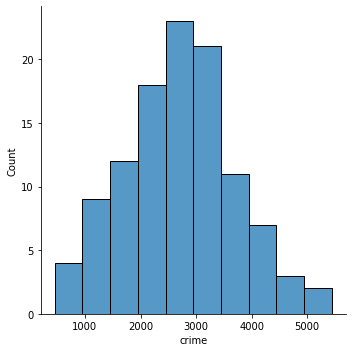

In [ ]:
sns.displot(dataset_94093, x= 'crime',multiple='stack')

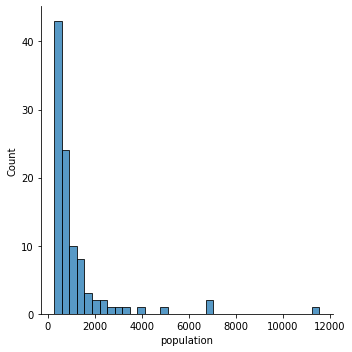

In [ ]:
sns.displot(dataset_94093, x= 'population',multiple='stack')

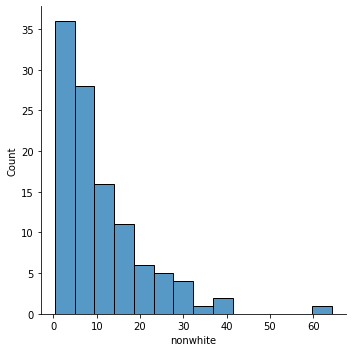

In [ ]:
sns.displot(dataset_94093, x= 'nonwhite',multiple='stack')

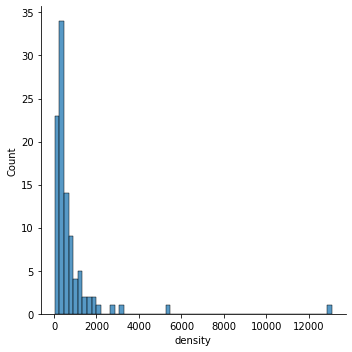

In [ ]:
sns.displot(dataset_94093, x= 'density',multiple='stack')

##Regresión Lineal Múltiple

Se toma como variable dependiente el Crimen, es decir, asumimos que el crimen está en función de la población, la población no blanca y la densidad de la población. Se espera que estos regresores sean significativos y también estén prediciendo de buena forma el crimen de una región.

In [ ]:
mod = smf.ols('crime ~ population + nonwhite + density', data=dataset_94093).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     9.493
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           1.50e-05
Time:                        21:17:33   Log-Likelihood:                -817.52
No. Observations:                 100   AIC:                             1643.
Df Residuals:                      96   BIC:                             1653.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2193.7009    143.046     15.336      0.0

Se encuentra que todas las variables, salvo la densidad son significativas, esto es debido a que tienen un valor-p inferior al 0.05 (nivel de significancia) lo cual no sucede con la densidad.
Por ende, se vuelve a modelar la regresión, eliminando la variable densidad.

In [ ]:
mod_2 = smf.ols('crime ~ population + nonwhite', data=dataset_94093).fit()
print(mod_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     14.32
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           3.56e-06
Time:                        21:21:56   Log-Likelihood:                -817.58
No. Observations:                 100   AIC:                             1641.
Df Residuals:                      97   BIC:                             1649.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2184.8261    139.785     15.630      0.0

Una vez eliminada la variable Densidad, se encuentran que todas las demás variables son significativas, al igual que el modelo, dado su Prueba F de significancia global, que también es inferior a 0.05, por lo cual no descarto la hipotesis nula de significancia global.

El modelo es ajustado, y aceptable, sin embargo tiene un R^2 muy bajo, lo que indica que se deberían ingresar más variables para poder predecir de mejor forma el comportamiento del crimen.

En conclusión, dado una variación en la cantidad de población en una unidad el crimen variaría 0.697, y ante una variación de 1 en la población no blanca, el crimen variía 26.11 (Dejando todo lo demás constante, respectivamente).

##Correlación

In [ ]:
corr_matrix = dataset_94093.corr(method='pearson')
round(corr_matrix,2)

,population,nonwhite,density,crime
population,1.00,0.07,0.37,0.40
nonwhite,0.07,1.00,0.00,0.27
density,0.37,0.00,1.00,0.11
crime,0.40,0.27,0.11,1.00


##HeatMap


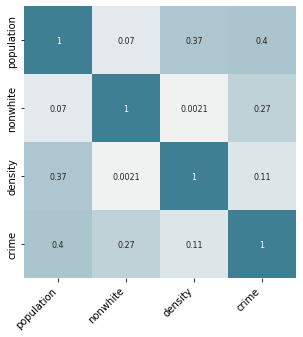

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

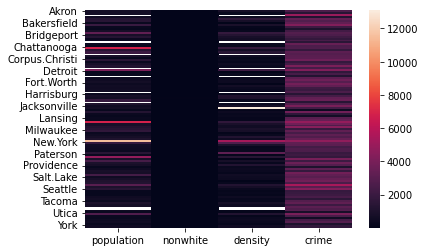

In [ ]:
sns.heatmap(dataset_94093)

##Clustering

Población

Text(0.5, 1.0, 'Clustering Density')

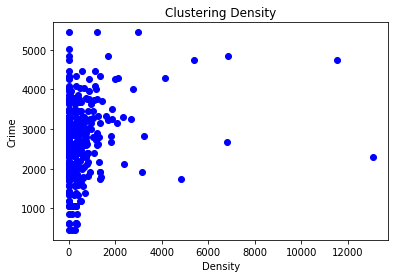

In [ ]:
plt.scatter(dataset_94093['population'],dataset_94093['crime'], c='blue')
plt.xlabel('Population',fontsize = 10)
plt.ylabel('Crime',fontsize = 10)
plt.title('Clustering Population')

plt.scatter(dataset_94093['nonwhite'],dataset_94093['crime'], c='blue')
plt.xlabel('Nonwhite',fontsize = 10)
plt.ylabel('Crime',fontsize = 10)
plt.title('Clustering Nonwhite')

plt.scatter(dataset_94093['density'],dataset_94093['crime'], c='blue')
plt.xlabel('Density',fontsize = 10)
plt.ylabel('Crime',fontsize = 10)
plt.title('Clustering Density')

Nonwhite

Text(0.5, 1.0, 'Clustering Nonwhite')

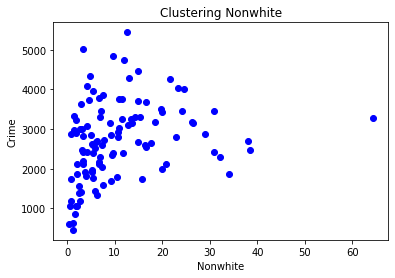

In [ ]:
plt.scatter(dataset_94093['nonwhite'],dataset_94093['crime'], c='blue')
plt.xlabel('Nonwhite',fontsize = 10)
plt.ylabel('Crime',fontsize = 10)
plt.title('Clustering Nonwhite')

Density

Text(0.5, 1.0, 'Clustering Density')

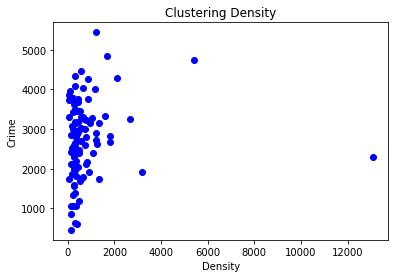

In [ ]:
plt.scatter(dataset_94093['density'],dataset_94093['crime'], c='blue')
plt.xlabel('Density',fontsize = 10)
plt.ylabel('Crime',fontsize = 10)
plt.title('Clustering Density')

In [ ]:
population=dataset_94093[['population','crime']].dropna()
nonwhite=dataset_94093[['nonwhite','crime']]
density=dataset_94093[['density','crime']].dropna()

model_population = KMeans(n_clusters=2, max_iter=1000)
X_scaled_population = scale(population)
model_population.fit(population)
y_labels = model_population.labels_

model_nonwhite = KMeans(n_clusters=3, max_iter=1000)
X_scaled_nonwhite = scale(nonwhite)
model_nonwhite.fit(nonwhite)
y_labels = model_nonwhite.labels_

model_density = KMeans(n_clusters=3, max_iter=1000)
X_scaled_density = scale(density)
model_density.fit(density)
y_labels = model_density.labels_

In [ ]:
y_predict_population = model_population.predict(X_scaled_population)
y_predict_nonwhite = model_nonwhite.predict(X=X_scaled_nonwhite)
y_predict_density = model_density.predict(X=X_scaled_density)

Text(0, 0.5, 'Crime')

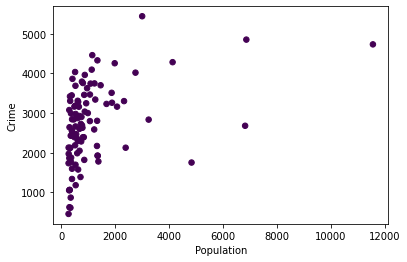

In [ ]:
plt.scatter(population['population'],population['crime'], c= y_predict_population, s= 30)
plt.xlabel('Population', fontsize=10)
plt.ylabel('Crime', fontsize=10)

Text(0, 0.5, 'Crime')

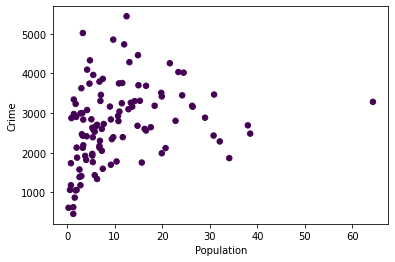

In [ ]:
plt.scatter(nonwhite['nonwhite'],nonwhite['crime'], c= y_predict_nonwhite, s= 30)
plt.xlabel('Nonwhite', fontsize=10)
plt.ylabel('Crime', fontsize=10)

Text(0, 0.5, 'Crime')

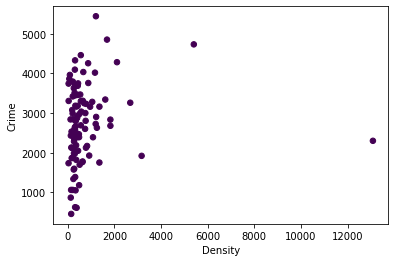

In [ ]:
plt.scatter(density['density'],density['crime'], c= y_predict_density, s= 30)
plt.xlabel('Density', fontsize=10)
plt.ylabel('Crime', fontsize=10)

##Respuesta
No se detectan patrones significativos que resaltar, esto es comprobado por la baja correlación que hay entre las variables con respecto al Crimen, lo cual también se comprobó en la regresión lineal y en la matriz de correlación, donde sus coeficientes de correlación no pasaban en ningún caso del 40%, y su R^2 era bajo también. Lo cual indica que no hay una relación muy directa entre las variables.

Se encuentra nulos los clusters esperados, por lo que no encontré un patrón relevante para poder asignar una vigilancia adicional. Esto se confirma con los scatterplot que están sumamente dispersos, y todo apunta a que no importa si tienes baja población, densidad o no blancos, habrá crimen. Se considera eliminar las variables atípicas que pueden estar afectando el modelo, sin embargo se mencoina nuevamente que esta variable explicativa no está bien explicada por las variables asignadas y se recomienda el uso de unas nuevas.


#Punto 5
Una empresa de ventanas tiene tres empleados que hacen dos tipos de ventanas: con marco de madera o de aluminio. La compañía obtiene 300 dólares de utilidad por cada ventana de marco de madera y 150 dólares de utilidad por cada una de aluminio. El trabajador 1 hace marcos de madera y puede hacer 6 por día. El trabajador 2 hace 4 marcos de aluminio por día. El trabajador 3 forma y corta el vidrio y puede hacer 48 pies^2 de vidrio por día. Cada ventana con marco de madera emplea 6 pies^2 de vidrio y cada una de aluminio 8 pies^2. La empresa quiere saber cuántas ventanas de cada tipo producir para maximizar la ganancia total. Formule el problema y resuélvalo.

##Respuesta

In [ ]:
Matriz = pd.DataFrame([[6,0,6,60],[0,4,8,30]],index=('Madera','Acero'),columns=('Empleado 1', 'Empleado 2', 'Vidrio','Ganancias'))
Matriz


,Empleado 1,Empleado 2,Vidrio,Ganancias
Madera,6,0,6,60
Acero,0,4,8,30


Se tiene entonces que la **Función Objetivo es:**


> **Max(Z)** = 60 x Madera + 30 x Aluminio

**Restricciones**

> Madera <= 6

> Aluminio <= 4

> 6 x Madera + 8 x Aluminio <= 48

> Madera, Aluminio >= 0

**Igualando las restricciones**

>Madera = 6

>Aluminio = 4

>6 x Madera + 8 x Aluminio = 48

**Sacando Valores para Madera, Aluminio**
> (1 x Madera + 0 x Aluminio = 6) x -6

___

>  -6 x Madera - 0 x Aluminio = -36

> 6 x Madera + 8 x Aluminio = 48
___
>0 x Madera + 8 Aluminio = 12

Entonces, **Aluminio = 12/8 = 3/2**

Reemplazo Aluminio y encuentro Madera

> 6 x Madera + 8 x (3/2) = 48

Entonces **Madera = 36/6 = 6**

Reemplazando en la **Función Objetivo**

>**Max(Z)** = 60 x 6 + 30 x 3/2

**Max(Z)** = 405

**En conclusión, se necesitan 6 marcos de madera y 1.5 (3/2) marcos de aluminio para maximizar la ganancia y obtener $405,











#Punto 6


##Datos

In [ ]:
# Obtener datos: dataset-94093
#https://drive.google.com/file/d/1bSHKnCqFKN03juX8gzTNW_LE9EtIxyow/view?usp=sharing

!wget 'https://drive.google.com/uc?export=download&id=1bSHKnCqFKN03juX8gzTNW_LE9EtIxyow' -O HistConsultas.csv

--2021-10-15 05:29:26--  https://drive.google.com/uc?export=download&id=1bSHKnCqFKN03juX8gzTNW_LE9EtIxyow
Resolving drive.google.com (drive.google.com)... 74.125.195.113, 74.125.195.138, 74.125.195.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eenshevh3tk8popejlotqiimg8vkdou4/1634275725000/13858096913736680706/*/1bSHKnCqFKN03juX8gzTNW_LE9EtIxyow?e=download [following]
--2021-10-15 05:29:27--  https://doc-0g-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eenshevh3tk8popejlotqiimg8vkdou4/1634275725000/13858096913736680706/*/1bSHKnCqFKN03juX8gzTNW_LE9EtIxyow?e=download
Resolving doc-0g-0s-docs.googleusercontent.com (doc-0g-0s-docs.googleusercontent.com)... 74.125.199.132, 2607:f8b0:400e:c02::84
Connecting to doc-0g-0s-docs.googleusercontent.com (doc-0g

In [ ]:
HistConsultas = pd.read_csv('HistConsultas.csv',sep=';',encoding='latin')
HistConsultas

,ID_Cuenta,Fecha_consulta,Tipo_consulta
0,340,2015-06-22 16:14:35,Actualización datos
1,340,2015-06-22 16:37:02,Agendamiento citas
2,340,2015-06-22 15:50:56,Agendamiento citas
3,4d5c0e16-9bef-8334-687e-55f043e02c62,2015-09-09 14:35:37,Agendamiento citas
4,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,2015-07-24 20:36:26,Agendamiento citas
...,...,...,...
641475,YA5972336,2015-06-23 18:09:45,Agendamiento citas
641476,YA5981643,2015-06-23 19:35:04,Actualización datos
641477,YB429084,2015-08-19 21:28:34,Agendamiento citas
641478,YO231519S,2015-06-30 13:05:21,Información general


In [ ]:
# Obtener datos: dataset-94093
#https://drive.google.com/file/d/19kxrI7QanUFIJ-JHFAm_-aHpg67bg49E/view?usp=sharing

!wget 'https://drive.google.com/uc?export=download&id=19kxrI7QanUFIJ-JHFAm_-aHpg67bg49E' -O Usuarios.csv

--2021-10-15 05:29:24--  https://drive.google.com/uc?export=download&id=19kxrI7QanUFIJ-JHFAm_-aHpg67bg49E
Resolving drive.google.com (drive.google.com)... 74.125.195.101, 74.125.195.138, 74.125.195.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eu3hlpt2st6f77jmnh98e3nq236srp97/1634275725000/13858096913736680706/*/19kxrI7QanUFIJ-JHFAm_-aHpg67bg49E?e=download [following]
--2021-10-15 05:29:26--  https://doc-0s-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eu3hlpt2st6f77jmnh98e3nq236srp97/1634275725000/13858096913736680706/*/19kxrI7QanUFIJ-JHFAm_-aHpg67bg49E?e=download
Resolving doc-0s-0s-docs.googleusercontent.com (doc-0s-0s-docs.googleusercontent.com)... 74.125.199.132, 2607:f8b0:400e:c02::84
Connecting to doc-0s-0s-docs.googleusercontent.com (doc-0s

In [ ]:
Usuarios = pd.read_csv('Usuarios.csv',sep=';',encoding='latin')
Usuarios

,ID_Cuenta,Tipo_persona,Departamento
0,340,soltero,Santafé de Bogotá
1,4d5c0e16-9bef-8334-687e-55f043e02c62,soltero,Santafé de Bogotá
2,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,soltero,Santafé de Bogotá
3,1640de7c-ba08-cdfc-c21b-517fd7c5a259,soltero,Santafé de Bogotá
4,e820f090-f4e7-eb8b-677c-55808c868b6f,unión libre,Santafé de Bogotá
...,...,...,...
337046,YA5972336,soltero,Santafé de Bogotá
337047,YA5981643,soltero,Santafé de Bogotá
337048,YB429084,NaN,Santafé de Bogotá
337049,YO231519S,soltero,Exterior


In [ ]:
bd_customers = pd.merge(HistConsultas,Usuarios, how='right', on='ID_Cuenta')
bd_customers

,ID_Cuenta,Fecha_consulta,Tipo_consulta,Tipo_persona,Departamento
0,340,2015-06-22 16:14:35,Actualización datos,soltero,Santafé de Bogotá
1,340,2015-06-22 16:37:02,Agendamiento citas,soltero,Santafé de Bogotá
2,340,2015-06-22 15:50:56,Agendamiento citas,soltero,Santafé de Bogotá
3,4d5c0e16-9bef-8334-687e-55f043e02c62,2015-09-09 14:35:37,Agendamiento citas,soltero,Santafé de Bogotá
4,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,2015-07-24 20:36:26,Agendamiento citas,soltero,Santafé de Bogotá
...,...,...,...,...,...
722245,YA5972336,2015-06-23 18:09:45,Agendamiento citas,soltero,Santafé de Bogotá
722246,YA5981643,2015-06-23 19:35:04,Actualización datos,soltero,Santafé de Bogotá
722247,YB429084,2015-08-19 21:28:34,Agendamiento citas,NaN,Santafé de Bogotá
722248,YO231519S,2015-06-30 13:05:21,Información general,soltero,Exterior


##a. ¿Existe alguna relación entre el tipo de persona y el tipo de consulta realizada

In [ ]:
#bd_customers.pivot_table(index='Tipo_consulta',columns='Tipo_persona',values='Tipo_consulta',aggfunc='cou')

In [ ]:
bd_customers['Tipo_consulta'].unique()

array(['Actualización datos', 'Agendamiento citas', 'Peticiones y quejas',
       'Procesos web', 'Información general'], dtype=object)

In [ ]:
bd_customers['Tipo_persona'].unique()

array(['soltero', 'unión libre', 'casado', 'soltero-casado.', 'no sabe',
       '/casado.', nan, 'no dijo', 'carlos'], dtype=object)

(array([125884.,      0., 179227.,      0.,      0., 117189.,      0.,
        279561.,      0.,  20389.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

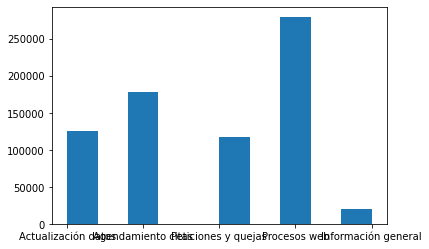

In [ ]:
plt.hist(bd_customers['Tipo_consulta'])

In [ ]:
grouped_df = bd_customers.groupby('Tipo_consulta')
counter = grouped_df.count()
counter

,ID_Cuenta,Fecha_consulta,Tipo_persona,Departamento
Tipo_consulta,,,,
Actualización datos,125884,125884,123398,125884
Agendamiento citas,179227,179227,175727,179227
Información general,20389,20389,20026,20389
Peticiones y quejas,117189,117189,114853,117189
Procesos web,279561,279561,273779,279561


In [ ]:
grouped_df2 = bd_customers.groupby('Tipo_persona')
counter2 = grouped_df2.count()
counter2

,ID_Cuenta,Fecha_consulta,Tipo_consulta,Departamento
Tipo_persona,,,,
/casado.,21618,21618,21618,21618
carlos,96,96,96,96
casado,8927,8927,8927,8927
no dijo,6933,6933,6933,6933
no sabe,22121,22121,22121,22121
soltero,498477,498477,498477,498477
soltero-casado.,7171,7171,7171,7171
unión libre,142440,142440,142440,142440


In [ ]:
bd_customers['Tipo_consulta'].value_counts()

Procesos web           279561
Agendamiento citas     179227
Actualización datos    125884
Peticiones y quejas    117189
Información general     20389
Name: Tipo_consulta, dtype: int64

In [ ]:
bd_customers['Departamento'].value_counts()

Santafé de Bogotá    488843
Antioquia             49995
Valle del Cauca       36783
Cundinamarca          27964
SANTAFÉ DE BOGOTÁ     25772
                      ...  
CAQUETÁ                  10
CHOCÓ                     6
AMAZONAS                  5
VAUPÉS                    3
GUAVIARE                  1
Name: Departamento, Length: 66, dtype: int64